In [1]:
#Data Source Kaggle.com
os.getcwd()

NameError: name 'os' is not defined

In [2]:
import os
os.getcwd()

'C:\\Users\\sim\\Miniconda2'

In [6]:
import pandas as pd
train_df = pd.read_csv('C:\\Users\\sim\\Miniconda2\\titanic\\data\\raw\\train.csv',index_col = 'PassengerId')
test_df = pd.read_csv('C:\\Users\\sim\\Miniconda2\\titanic\\data\\raw\\test.csv',index_col = 'PassengerId')

In [10]:
type(test_df)
df = pd.concat((train_df,test_df),axis =0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [23]:
#Data munging for Embarked column
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [26]:
#Configuring out ways to replace null for Embarked value 
df.Embarked.value_counts()#distinct count
# A: since embarked 'S' has highest value we can replace null with 'S'
#Or
# embarked value withrespect to Survived feature
pd.crosstab(df[df.Survived!=-88].Survived,df[df.Survived!=-88].Embarked)
#Again since embarked with 'S' survived more so we set null values with 'S'
df.Embarked.fillna('S',inplace=True)


In [29]:
df.info()
df[df.Embarked.isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [30]:
#similarly filling up Fare null values
df[df.Fare.isnull()]
#to replace the NaN for Fare we can consider Pclass and Embarked column values

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [34]:
#median value of Fare for those who are in 3 Pclass anf S Embarked values.
median_fare=df[(df.Embarked=='S') & (df.Pclass ==3)].Fare.median()

In [35]:
df.Fare.fillna(median_fare,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


In [38]:
#filling up for Age
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1.0,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0,2677


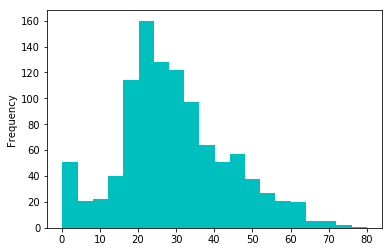

In [44]:
#Analyzing Age through histogram
df.Age.plot(kind = 'hist',bins = 20,color = 'c')

In [58]:
#replace with median age of gender
df.groupby('Sex').Age.median()


Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [59]:
df.Age.fillna(28,inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


In [63]:
#Feature Engineering
#Feature: AgeState [Adult or Child]
import numpy as np
df['AgeState'] = np.where(df['Age'] >= 18,'Adult','Child')

In [73]:
df['AgeState'].value_counts()

Adult    1155
Child     154
Name: AgeState, dtype: int64

In [75]:
#use unique to get unique values
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',